In [1]:
import stock_data

import pandas
import numpy
import datetime
import matplotlib
import matplotlib.pyplot 

In [2]:
%matplotlib inline
matplotlib.style.use('ggplot')

# Get data

#### Notes:
    
We're going to use our all_closing_prices() function from the stock data module to retrieve the aggregated data across all 500 stocks. 

In [3]:
all_data = stock_data.get_all_closing_prices("../stock_csvs/")

In [4]:
all_data.aa.head()

,time,open,high,low_price,close,volume
date,,,,,,
1998-01-02,0,13.3754,13.4223,13.2462,13.3511,2739839.602
1998-01-05,0,13.4916,13.7033,13.4691,13.5853,5332919.264
1998-01-06,0,13.5159,13.5159,13.2817,13.2817,4019035.876
1998-01-07,0,13.0344,13.3042,13.0344,13.3042,3450682.202
1998-01-08,0,13.3042,13.3979,12.7421,12.7533,2440987.524


# Indexing

### Columns

In [5]:
all_data['aapl'].head()

,time,open,high,low_price,close,volume
date,,,,,,
1998-01-02,0,3.31397,3.95098,3.28236,3.95098,24947201.10
1998-01-05,0,4.01177,4.02635,3.69325,3.89020,22344145.08
1998-01-06,0,3.87561,4.98432,3.58628,4.60502,63150252.55
1998-01-07,0,4.57341,4.68040,4.20871,4.24032,36978255.52
1998-01-08,0,4.24032,4.52965,4.11875,4.39107,27687622.95


#### Notes:
    
Anyone who has spent any time using Pandas is probably familiar with the somewhat ominous-looking slice vs. copy warnings that will occasionally arise when calling a portion of a DataFrame.

These warnings mean to show you that there is the potential that your requested portion-of-a-DataFrame retreival will actually return you a portion of a copy of the DataFrame, and not a portion of the DataFrame itself. This is important - if you plan to modify a DataFrame, then you really do want to modify THAT DataFrame, and not a copy of it. 

The problem is, for me personally and more than a few other Pandas users out there too, that these warnings are not always easy to get ahead of. Sometimes they fire when in fact you are not working with a copy. Sometimes they seem to not fire even when you are using potentially problematic syntax. You can disable the warnings, but that means risking missing a potentially real data issue. 

In my efforts to get to the bottom of this, the best I have been able to come up with so far is:
    
    When using a MultiIndex, it is good to use .loc, as opposed to simply bracketing, to specify columns 
    and/or rows, even when selecting all. 

That means that:

In [6]:
all_data.loc[:, ('aapl', 'close')].head()

date
1998-01-02    3.95098
1998-01-05    3.89020
1998-01-06    4.60502
1998-01-07    4.24032
1998-01-08    4.39107
Name: (aapl, close), dtype: float64

Is generally preferable to:

In [7]:
all_data['aapl']['close'].head()

date
1998-01-02    3.95098
1998-01-05    3.89020
1998-01-06    4.60502
1998-01-07    4.24032
1998-01-08    4.39107
Name: close, dtype: float64

Of course, it all depends on your particular situation. The potential for accidental copying is something that's just good to keep in mind. 

### Rows

#### Notes:
    
The Pandas Index is loaded with cool features. 

In [8]:
all_data.index[:10]

DatetimeIndex(['1998-01-02', '1998-01-05', '1998-01-06', '1998-01-07',
               '1998-01-08', '1998-01-09', '1998-01-12', '1998-01-13',
               '1998-01-14', '1998-01-15'],
              dtype='datetime64[ns]', name='date', freq=None)

#### Notes:
    
Here we select a 2-day slice of our data using the numpy module's datetime64() function

In [9]:
all_data.loc[
    numpy.datetime64('1998-01-02') : numpy.datetime64('1998-01-05')]

a                                    aa                    \
           time open high low_price close volume time     open     high   
date                                                                      
1998-01-02  NaN  NaN  NaN       NaN   NaN    NaN    0  13.3754  13.4223   
1998-01-05  NaN  NaN  NaN       NaN   NaN    NaN    0  13.4916  13.7033   

                      ...       zion                                 zmh       \
           low_price  ...       high low_price    close      volume time open   
date                  ...                                                       
1998-01-02   13.2462  ...    36.6077   35.8119  36.2098  140860.907  NaN  NaN   
1998-01-05   13.4691  ...    36.9102   36.2098  36.9102  116483.493  NaN  NaN   

                                        
           high low_price close volume  
date                                    
1998-01-02  NaN       NaN   NaN    NaN  
1998-01-05  NaN       NaN   NaN    NaN  

[2 rows x 3000 columns]

#### Notes:
    
And here, a 10-day snapshot out of aapl's data from the year 2000 onwards. 

In [10]:
all_data['aapl'].loc[numpy.datetime64('2000-01-01'):].head(10)

,time,open,high,low_price,close,volume
date,,,,,,
2000-01-03,0,25.5002,27.3530,24.7246,27.1852,18438128.13
2000-01-04,0,26.3196,26.8983,24.6031,24.9070,17601971.28
2000-01-05,0,25.2255,26.8813,25.0431,25.2863,26990077.24
2000-01-06,0,25.8042,26.0157,23.0981,23.1127,26915221.62
2000-01-07,0,23.4628,24.5569,23.2196,24.1630,15651221.11
2000-01-10,0,24.8001,24.8608,23.0373,23.7667,17316948.00
2000-01-11,0,23.3266,24.1630,22.0039,22.6118,15291344.43
2000-01-12,0,23.0981,23.2196,21.0314,21.2137,34529016.13
2000-01-13,0,22.9716,24.0099,22.4902,23.5090,33902210.01


### Using our hierarchical column structure

#### Notes:

To create a new DataFrame of only closing prices, we check to see if the second level column (first level is ticker) is 'in' the word close, and return all rows for that subset of columns.

In [11]:
close = all_data.ix[:, all_data.columns.get_level_values(1).isin({"close"})]

#### Notes:
    
In addition to using the head() method to take a peak at our data, we can also use the .ix selector, which allows us to select how many columns we'd like, which is nice when we have as many as we do here. 

In [12]:
close.ix[:5, :5]

,a,aa,aapl,abbv,abc
,close,close,close,close,close
date,,,,,
1998-01-02,NaN,13.3511,3.95098,NaN,6.50799
1998-01-05,NaN,13.5853,3.89020,NaN,6.40419
1998-01-06,NaN,13.2817,4.60502,NaN,6.28477
1998-01-07,NaN,13.3042,4.24032,NaN,6.34839
1998-01-08,NaN,12.7533,4.39107,NaN,6.38299


# Plotting

### Simple plotting

In [13]:
avg_close = close.mean(axis=1)

In [14]:
avg_close.head()

date
1998-01-02    19.282552
1998-01-05    19.225251
1998-01-06    19.069986
1998-01-07    18.955232
1998-01-08    18.806100
dtype: float64

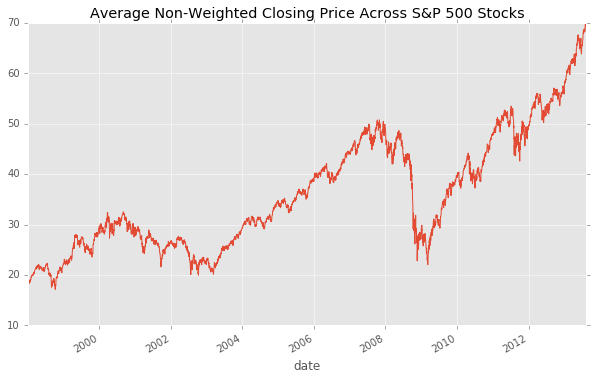

In [15]:
plot = avg_close.plot(figsize=(10,6),
                      title='Average Non-Weighted Closing Price Across S&P 500 Stocks')

### More advanced plotting

#### Notes:

We will use the rolling function, which provides a rolling window that allows for calculations, to calculate a rolling 30 day average closing price, and plot that against our closing prices.

In [16]:
avg_close_roll_thirty = avg_close.rolling(center=False, window=30).mean()

In [17]:
combined = pandas.concat([avg_close, avg_close_roll_thirty], axis=1)

In [18]:
combined.head()

,0,1
date,,
1998-01-02,19.282552,NaN
1998-01-05,19.225251,NaN
1998-01-06,19.069986,NaN
1998-01-07,18.955232,NaN
1998-01-08,18.806100,NaN


In [19]:
combined.columns=['avg_close', 'avg_close_roll_thirty']

In [20]:
combined.head()

,avg_close,avg_close_roll_thirty
date,,
1998-01-02,19.282552,NaN
1998-01-05,19.225251,NaN
1998-01-06,19.069986,NaN
1998-01-07,18.955232,NaN
1998-01-08,18.806100,NaN


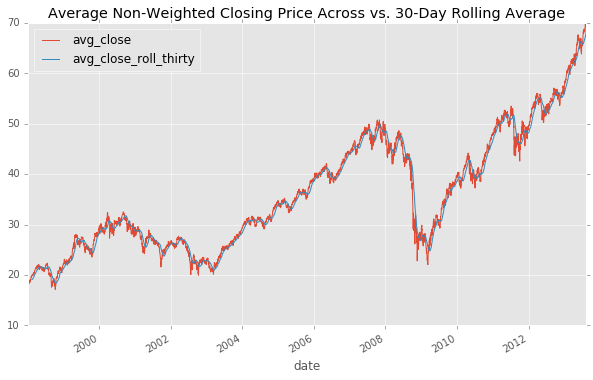

In [21]:
plot = combined.plot(figsize=(10,6),
                      title='Average Non-Weighted Closing Price Across vs. 30-Day Rolling Average')

#### Notes:
    
We will now make use the of the rolling method() again, only this time passing a window of 90.

In [22]:
avg_close_roll_ninety = avg_close.rolling(center=False, window=90).mean()

In [23]:
combined['avg_close_roll_ninety'] = avg_close_roll_ninety

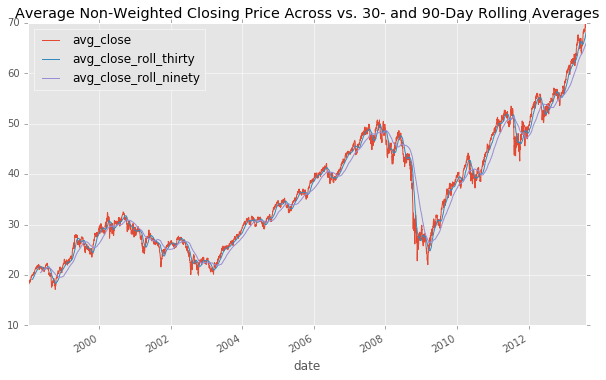

In [24]:
plot = combined.plot(figsize=(10,6),
                      title='Average Non-Weighted Closing Price Across vs. 30- and 90-Day Rolling Averages')

In [25]:
combined.describe()

,avg_close,avg_close_roll_thirty,avg_close_roll_ninety
count,3926.000000,3897.000000,3837.000000
mean,36.082386,36.024777,35.911517
std,11.571955,11.355359,10.955103
min,17.138981,18.291266,19.558926
25%,26.624177,26.651411,26.608548
50%,33.431195,33.420454,33.725473
75%,44.999082,45.207340,45.463405
max,69.754696,68.072600,65.972395
